Importing Library

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Converting csv into dataframe

In [85]:
df=pd.read_csv('output_1.csv')
df2=pd.read_csv('output_2.csv')

In [86]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


In [87]:
df2.head()

,Rank,Name,Industry,Revenue (USD billions),Employees,Headquarters
0,1,Cargill,Food industry,165.0,"155,000","Minnetonka, Minnesota"
1,2,Koch Industries,Conglomerate,125.0,"120,000","Wichita, Kansas"
2,3,Publix Super Markets,Retail,48.0,"230,000","Winter Haven, Florida"
3,4,"Mars, Incorporated",Food industry,45.0,"140,000","McLean, Virginia"
4,5,Pilot Corporation,Petroleum industry and Retail,41.9,"30,000","Knoxville, Tennessee"


Data preprocessing

In [88]:
df['Employees'] = df['Employees'].str.extract('(\d+)').astype(float)  
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].replace(',', '', regex=True).astype(float)
df['Revenue growth'] = df['Revenue growth'].replace('%', '', regex=True).astype(float)
df['Employees'] = df['Employees'].replace(',', '', regex=True).astype(float)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\AkshitaSaxena\AppData\Local\Temp\ipykernel_7916\2114632657.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Employees'] = df['Employees'].str.extract('(\d+)').astype(float)


In [89]:
df[['Revenue (USD millions)', 'Revenue growth']].head()

,Revenue (USD millions),Revenue growth
0,611289.0,6.7
1,513983.0,9.4
2,413680.0,44.8
3,394328.0,7.8
4,324162.0,12.7


In [90]:
df2['Employees'] = df2['Employees'].replace(',', '', regex=True)  
df2['Employees'] = df2['Employees'].str.extract('(\d+)').astype(float)  

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\AkshitaSaxena\AppData\Local\Temp\ipykernel_7916\667627437.py:2: SyntaxWarning: invalid escape sequence '\d'
  df2['Employees'] = df2['Employees'].str.extract('(\d+)').astype(float)


Adding columns

In [91]:
df['Revenue (USD billions)'] = df['Revenue (USD millions)'] / 1000
df['Company Type'] = 'Public Company'
df2['Company Type'] = 'Private Company'

Combining dataframe

In [92]:
combined_df = pd.concat([df, df2])

In [63]:
combined_df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Revenue (USD billions),Company Type
0,1,Walmart,Retail,611289.0,6.7,2.0,"Bentonville, Arkansas",611.289,Public Company
1,2,Amazon,Retail and cloud computing,513983.0,9.4,1.0,"Seattle, Washington",513.983,Public Company
2,3,ExxonMobil,Petroleum industry,413680.0,44.8,62.0,"Spring, Texas",413.680,Public Company
3,4,Apple,Electronics industry,394328.0,7.8,164.0,"Cupertino, California",394.328,Public Company
4,5,UnitedHealth Group,Healthcare,324162.0,12.7,400.0,"Minnetonka, Minnesota",324.162,Public Company
...,...,...,...,...,...,...,...,...,...
5,6,H-E-B,Retail,NaN,NaN,145000.0,"San Antonio, Texas",38.900,Private Company
6,7,Reyes Holdings,Wholesaling,NaN,NaN,33000.0,"Rosemont, Illinois",35.300,Private Company
7,8,C&S Wholesale Grocers,Wholesaling,NaN,NaN,14000.0,"Keene, New Hampshire",33.000,Private Company
8,9,Enterprise Holdings,Car rental,NaN,NaN,80000.0,"Clayton, Missouri",30.000,Private Company


Top 10 companies in public

In [77]:
top_10_revenue = df.nlargest(10, 'Revenue (USD millions)')

top_10_revenue.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Revenue (USD billions),Company Type
0,1,Walmart,Retail,611289.0,6.7,2.0,"Bentonville, Arkansas",611.289,Public Company
1,2,Amazon,Retail and cloud computing,513983.0,9.4,1.0,"Seattle, Washington",513.983,Public Company
2,3,ExxonMobil,Petroleum industry,413680.0,44.8,62.0,"Spring, Texas",413.680,Public Company
3,4,Apple,Electronics industry,394328.0,7.8,164.0,"Cupertino, California",394.328,Public Company
4,5,UnitedHealth Group,Healthcare,324162.0,12.7,400.0,"Minnetonka, Minnesota",324.162,Public Company


Visualization

Top 10 companies by Revenue

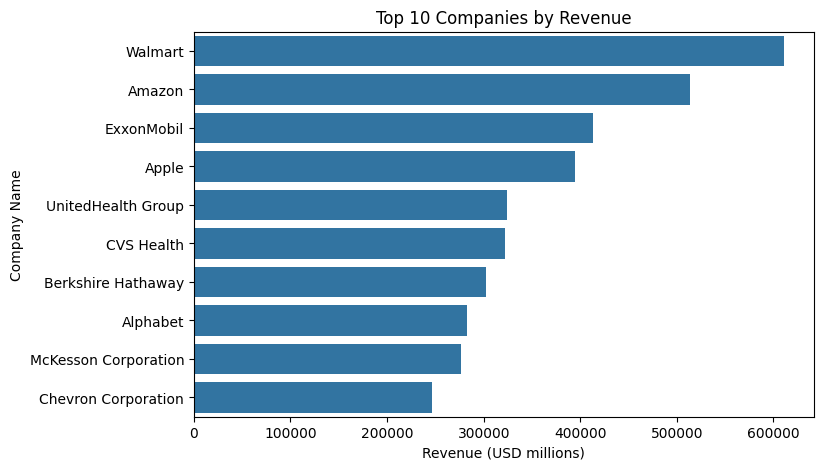

In [105]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Revenue (USD millions)', y='Name', data=top_10_revenue)
plt.title('Top 10 Companies by Revenue')
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Company Name')
plt.show()

Revenue Growth vs Revenue in billions for both public and private companies

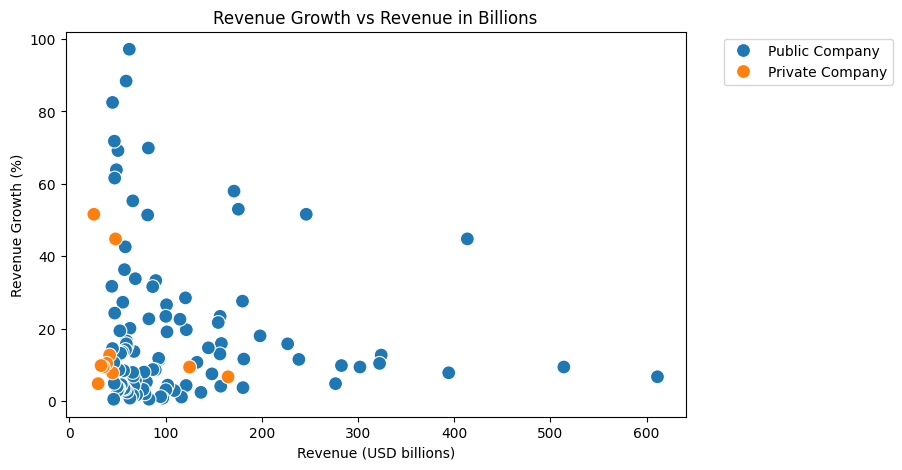

In [104]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Revenue (USD billions)', y='Revenue growth', data=combined_df, hue='Company Type', palette='tab10', s=100)
plt.title('Revenue Growth vs Revenue in Billions')
plt.xlabel('Revenue (USD billions)')
plt.ylabel('Revenue Growth (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Distribution of revenue in billions for public companies

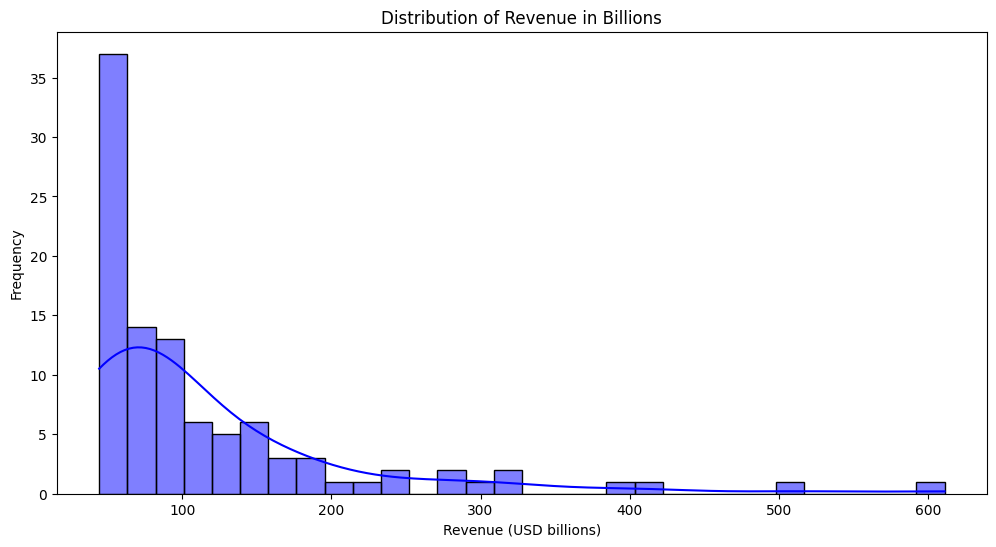

In [65]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Revenue (USD billions)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Revenue in Billions')
plt.xlabel('Revenue (USD billions)')
plt.ylabel('Frequency')
plt.show()


Revenue Growth by Industry

C:\Users\AkshitaSaxena\AppData\Local\Temp\ipykernel_7916\4112938132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Revenue growth', y='Industry', data=df, palette='Set2')


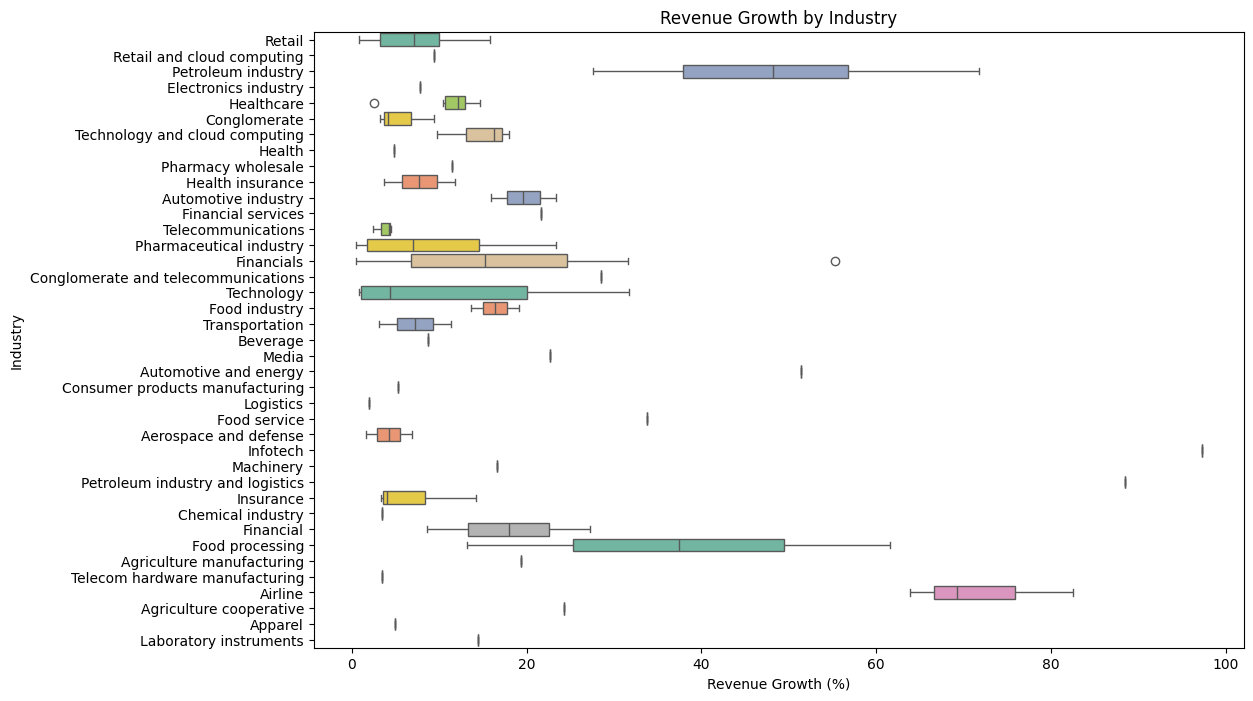

In [102]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Revenue growth', y='Industry', data=df, palette='Set2')
plt.title('Revenue Growth by Industry')
plt.xlabel('Revenue Growth (%)')
plt.ylabel('Industry')
plt.show()


Employees vs Revenue in Billions

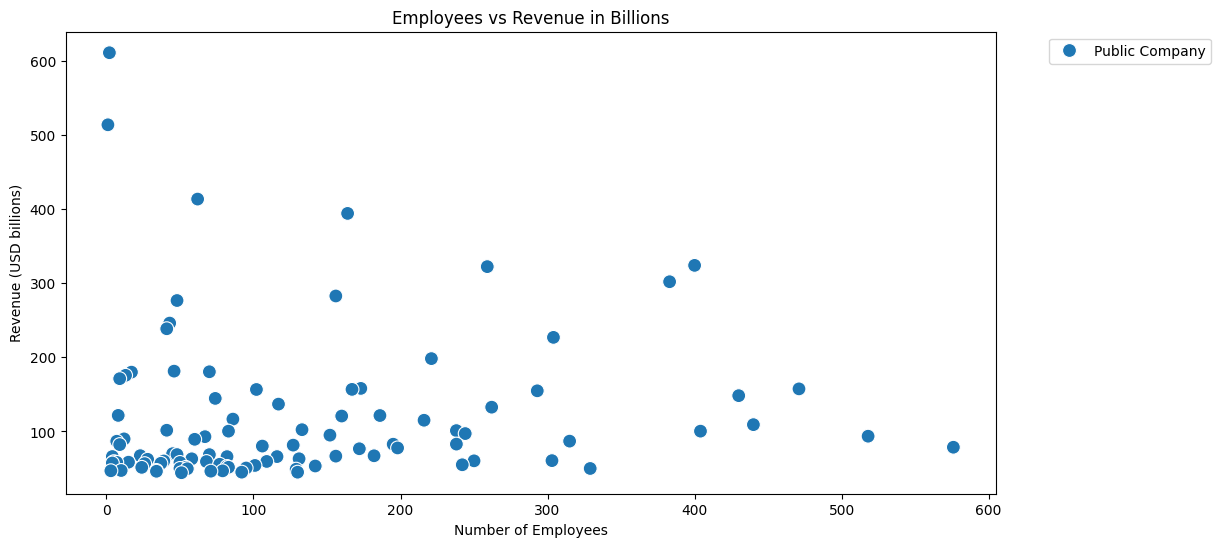

In [71]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Employees', y='Revenue (USD billions)', data=df, hue='Company Type', palette='tab10', s=100)
plt.title('Employees vs Revenue in Billions')
plt.xlabel('Number of Employees')
plt.ylabel('Revenue (USD billions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
